In [32]:
# imporint the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [33]:
# importing the dataset which is a csv file
dataset = pd.read_csv('Youtube01-Psy.csv')

In [34]:
# FEATURE ENGINEERING : SELECTING ONLY THE REQUIRED FEATURES
comments = dataset.iloc[:,3].values
classes  = dataset.iloc[:,4].values

In [35]:
# FITTIN THE VECTORIZING MODEL TO THE WORDS SO THAT THEY CAN BE EASILY FITTED TO MACHINE LEARNING MODEL
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(comments)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [36]:
# SPLITTING INTO TRAINING AND TESTING DATA
x_train , x_test , y_train , y_test = train_test_split(comments , classes)

In [37]:
# TRANSFORMING THE TRAIN AND TEST SET TO VECTORS
x_train = vectorizer.transform(x_train)
x_test  = vectorizer.transform(x_test)

In [38]:
# DECLARING THE CLASSIFIER WITH MAXIMUM ITERATION OF 1000 BUT IT CAN BE LEFT DEFAULT TO 100
classifier = LogisticRegression(max_iter=1000)

In [39]:
# FITTING THE LOGISTIC REGRESSION MODEL TO THE TRAINNING DATA 
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [40]:
# PREDICTING THE OUTCOMES ON THE TEST SET
prediction = classifier.predict(x_test)

$EVALUATING$ $THE$ $MODELS$ $PREDICTION$

In [41]:
# CHECKING THE ACCURACY ON TRAIN SET 
classifier.score(x_train,y_train) * 100 

99.61832061068702

In [42]:
# CHECKING THE ACCURACY ON TEST SET (^_^) WE GOT 94.3 % 
classifier.score(x_test,y_test) * 100

96.5909090909091

In [43]:
# CONFUSION MATRIX
cm = confusion_matrix(y_test,prediction)

In [44]:
# ONLY 5 WWRONG PREDICTIONS AND 44 + 39 = 83 CORRECT PREDICTION 
cm

array([[43,  0],
       [ 3, 42]])

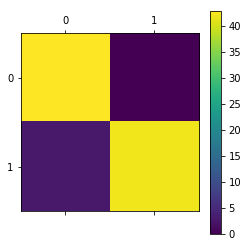

In [45]:
# VISUALIZING THE CONFUSION MATRIX
plt.matshow(cm)
plt.colorbar()

In [46]:
# DEFINING A FUNCTION FOR PREDICTING THE RESULT ON NEW DATA
def predict(x):
    x = vectorizer.transform(x)
    new_pred = classifier.predict(x)
    return new_pred

In [69]:
# CREATING A LIST OF NEW COMMENTS WHICH WE WANT TO TEST
new_ones = ['this is badd slaks mskjna gotto https:///jkjbshjb.com',
            'https://fajsagtsfgasj.com' ,
            'this is  badd slaks mskjna gotto https:///jkjbshjb.com',
            'earrn money online goto https:///femjasbhvd.com',
            'You can make money online and start working from home today as I am!   I am making over $3,000+ per month at MONEYGQ.COM !   Visit MONEYGQ.COM and check it out!  ']

In [70]:
new_ones

['this is badd slaks mskjna gotto https:///jkjbshjb.com',
 'https://fajsagtsfgasj.com',
 'this is  badd slaks mskjna gotto https:///jkjbshjb.com',
 'earrn money online goto https:///femjasbhvd.com',
 'You can make money online and start working from home today as I am!   I am making over $3,000+ per month at MONEYGQ.COM !   Visit MONEYGQ.COM and check it out!  ']

In [71]:
# 100 % CORRECT PREDICTION ONLY THE FIRST COMMENT IS OK AND OTHERS ARE SPAM
predict(new_ones)

array([1, 1, 1, 1, 1])

## $NOW$ $LET'S$ $CLASSIFY$ $THE$ $DATA$ $WITH$ $KNN$ $CLASSIFIER$

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
knn = KNeighborsClassifier(n_neighbors=3,n_jobs=3)

In [52]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=3, n_neighbors=3, p=2,
           weights='uniform')

In [53]:
knn_preds = knn.predict(x_test)

In [54]:
cm_knn = confusion_matrix(y_test,knn_preds)

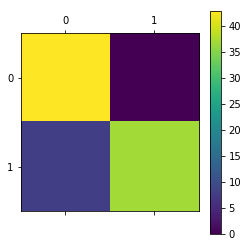

In [55]:
plt.matshow(cm_knn)
plt.colorbar()

In [56]:
cm_knn

array([[43,  0],
       [ 8, 37]])

In [57]:
knn.score(x_test,y_test) * 100

90.9090909090909

## $CLASSIFICATION$ $REPORTS$ $OF$ $BOTH$ $THE$ $CLASSIFIERS$ $:$

In [58]:
# CLASSIFICATION REPORT OF LOGISTIC REGRESSION
print(classification_report(y_test,prediction))


             precision    recall  f1-score   support

          0       0.93      1.00      0.97        43
          1       1.00      0.93      0.97        45

avg / total       0.97      0.97      0.97        88



In [59]:
# CLASSIFICATION REPORT OF KNN ALGORITHM
print(classification_report(y_test,knn_preds))

             precision    recall  f1-score   support

          0       0.84      1.00      0.91        43
          1       1.00      0.82      0.90        45

avg / total       0.92      0.91      0.91        88

